In [1]:
import matplotlib.pyplot as plt
import numpy as np
import inmobiliario_schelling as sch

In [2]:
L = 50
max_steps = 50

# Crea 4 modelos con diferente alpha (peso entre K y P)
sch_alpha = {}
sch_alpha[0.1] = sch.mercado_inmobiliario(L=L, alpha=0.1)
sch_alpha[0.3] = sch.mercado_inmobiliario(L=L, alpha=0.3)
sch_alpha[0.7] = sch.mercado_inmobiliario(L=L, alpha=0.7)
sch_alpha[0.9] = sch.mercado_inmobiliario(L=L, alpha=0.9)

# Almacenar la satisfacción total en cada paso para cada valor de Alpha
uti_alpha = {}
uti_alpha[0.1] = []
uti_alpha[0.3] = []
uti_alpha[0.7] = []
uti_alpha[0.9] = []

# Almacenar el capital total en cada paso para cada valor de Alpha
cap_alpha = {}
cap_alpha[0.1] = []
cap_alpha[0.3] = []
cap_alpha[0.7] = []
cap_alpha[0.9] = []

In [3]:
def criterio_equilibrio(serie, lag, tol):
    
    """
    Define cuando una serie temporal se encuentra en equilibrio 
    serie: List[Float64]
    lag: Int
    tol: Float64 
    
    """
    
    L = len(serie)
    if L <= lag:
        return False
    
    for i in range(L-1-lag , L-1):
        if np.abs((serie[i] - serie[i-1])/serie[i-1]) >= tol:
            return False
        
    return True

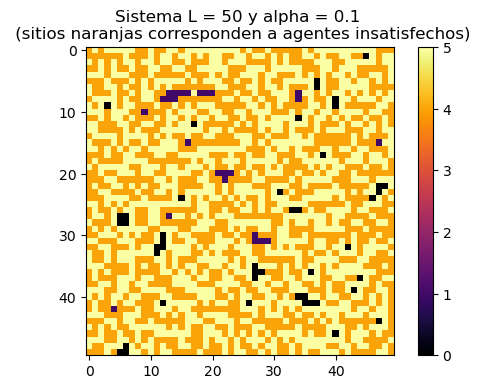

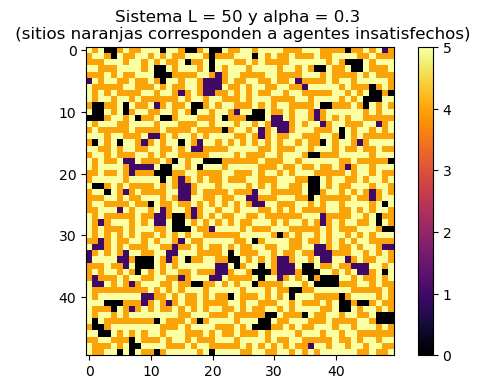

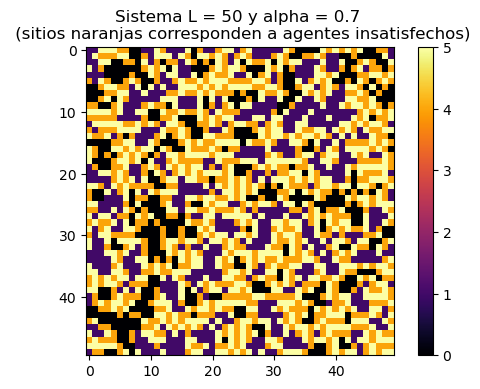

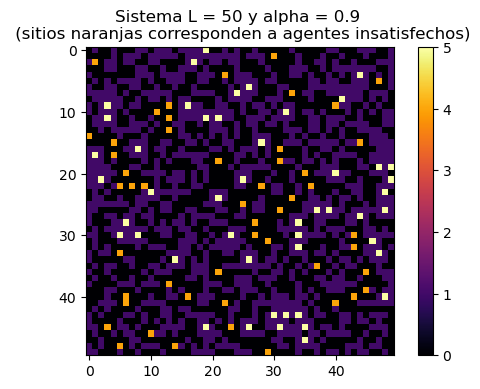

In [5]:
# configuraciones iniciales

sch_alpha[0.1].lattice_plot() 
sch_alpha[0.3].lattice_plot() 
sch_alpha[0.7].lattice_plot() 
sch_alpha[0.9].lattice_plot() 

In [6]:
for alpha in [0.1, 0.3, 0.7, 0.9]:
    for step in range(max_steps):
        sch_alpha[alpha].ronda_intercambio()
        uti_alpha[alpha].append(sch_alpha[alpha].utilidad_media())
        cap_alpha[alpha].append(sch_alpha[alpha].capital_medio())
        
        # Cortamos la evolución de la simulación antes de llegar a max_steps
        # si el sistema ya cumple la condición de equilibrio
        
        if criterio_equilibrio(uti_alpha[alpha], 20, 0.001):
            break  
        

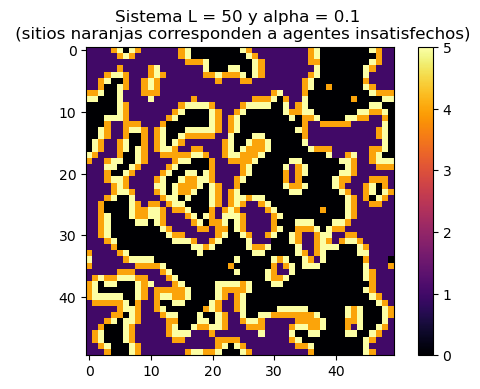

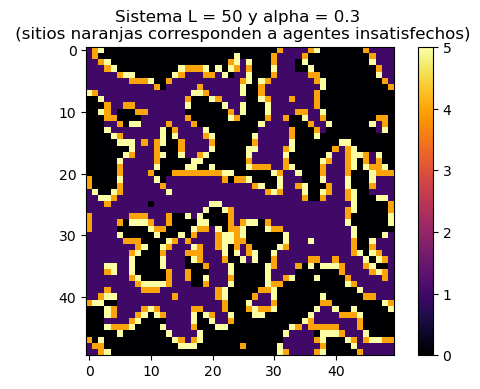

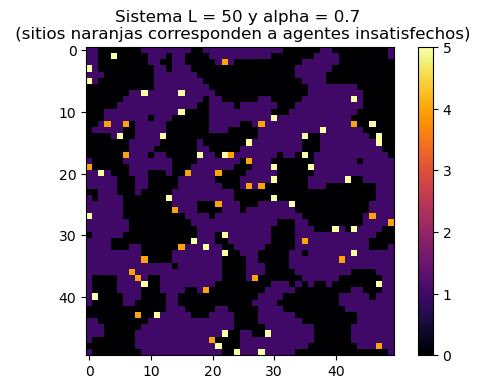

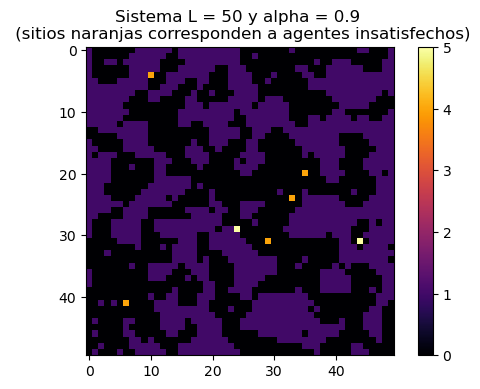

In [7]:
# configuraciones finales

sch_alpha[0.1].lattice_plot() 
sch_alpha[0.3].lattice_plot() 
sch_alpha[0.7].lattice_plot() 
sch_alpha[0.9].lattice_plot() 

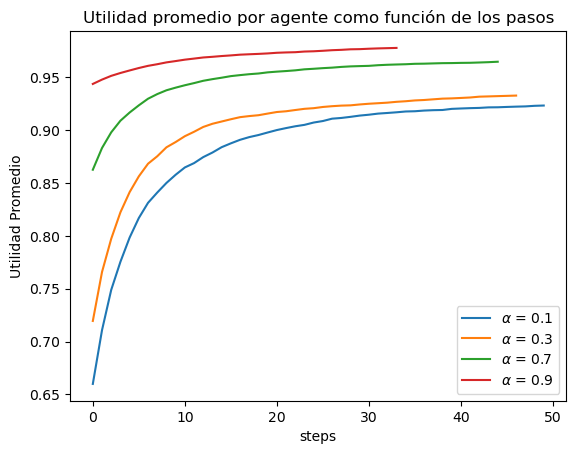

In [8]:
plt.plot(uti_alpha[0.1], label = r"$\alpha$ = 0.1")
plt.plot(uti_alpha[0.3], label = r"$\alpha$ = 0.3")
plt.plot(uti_alpha[0.7], label = r"$\alpha$ = 0.7")
plt.plot(uti_alpha[0.9], label = r"$\alpha$ = 0.9")



plt.xlabel("steps")
plt.ylabel("Utilidad Promedio")
plt.title("Utilidad promedio por agente como función de los pasos")
plt.legend()
plt.show()